# Introduction
Practice solving regression problems using the house price data set in Ames, Iowa, used in Week3.


By using 79 types of features (explanatory variables), you can set the problem of guessing the numerical value of housing prices. This kind of problem to guess continuous values is called a regression problem.

In [195]:
# predefines and imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk

## Data Prep

In [196]:
init_data = pd.read_csv('../Week 3/houseprice_train.csv')
display(house_price.head())
display(house_price.tail())

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


,GrLivArea,YearBuilt,SalePrice
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125
1459,1256,1965,147500


# Problem 1
## Feature selection for practice

In [197]:
house_price = init_data[['GrLivArea','YearBuilt','SalePrice']]
display(house_price.describe())
display(house_price.info())

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


None

### Null check

In [198]:
#check null
display('Any Null value?',house_price.isnull().sum().all())

'Any Null value?'

False

### Basic Visuals

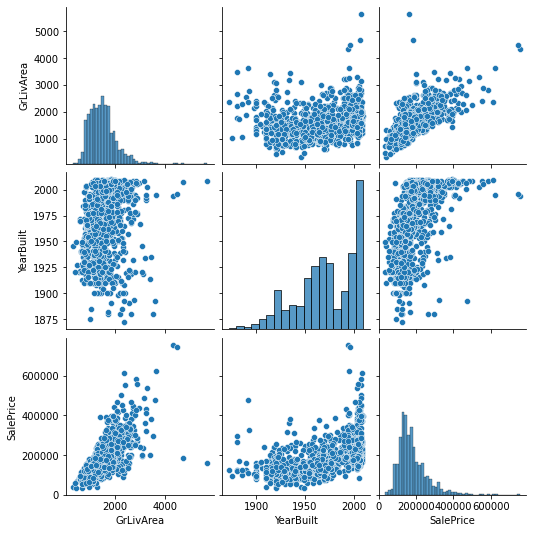

In [199]:
sns.pairplot(data = house_price)

# Problem 2
## Estimation and evaluation by linear regression

### Data Standardization and Separation

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = house_price[['GrLivArea','YearBuilt']]
Y = house_price[['SalePrice']]
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y).reshape((Y.shape[0],))
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
display(f'Train,Test shapes: Train:{x_train.shape,y_train.shape}, Test:{x_test.shape,y_test.shape}')

'Train,Test shapes: Train:((1168, 2), (1168,)), Test:((292, 2), (292,))'

### Regression

In [201]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
cls = LinearRegression()
cls.fit(x_train,y_train)
predictions = cls.predict(x_test)
display('Mean square Error:',mean_squared_error(y_test,predictions))

'Mean square Error:'

0.385843903177143

### Visualizing Predition Result

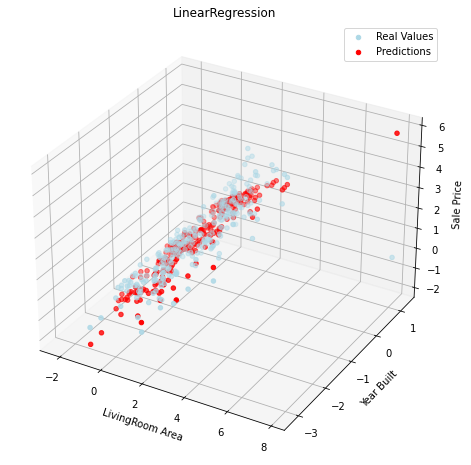

In [202]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(projection='3d')
ax.set_title('LinearRegression')
ax.scatter(x_test[:,0],x_test[:,1],y_test,c = 'lightblue')
ax.scatter(x_test[:,0],x_test[:,1],predictions,c = 'red')
ax.legend(['Real Values', 'Predictions'])
ax.set_xlabel('LivingRoom Area')
ax.set_ylabel('Year Built')
ax.set_zlabel('Sale Price')
plt.show()

# Problem 3
Comparison of methods

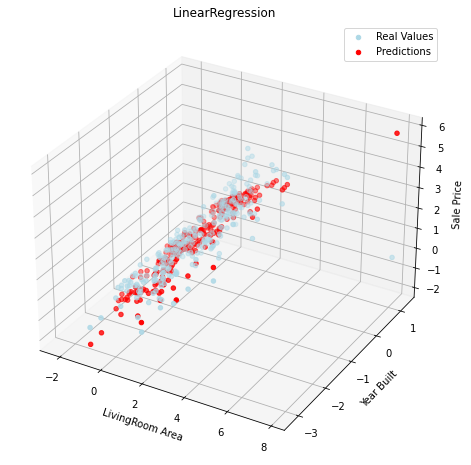

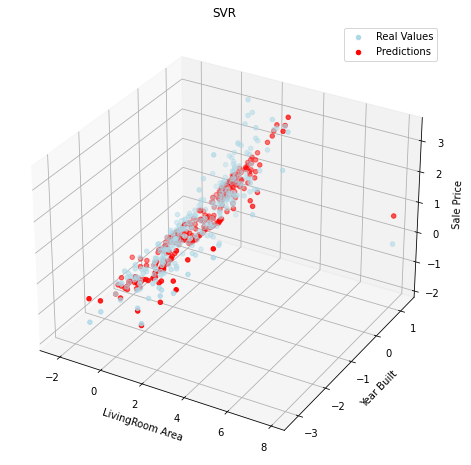

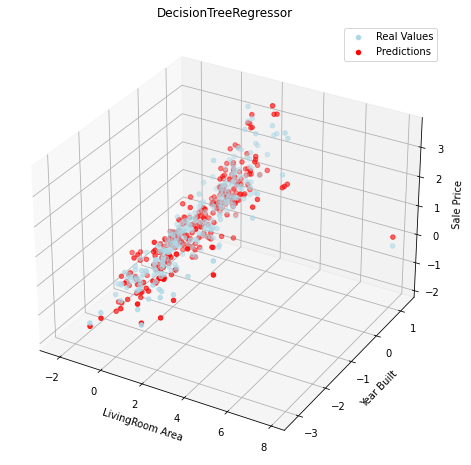

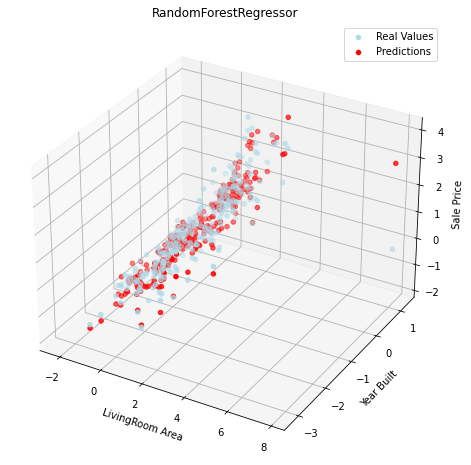

,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE,0.385844,0.218639,0.365407,0.257194


In [203]:
def plot_prediction(xtest,ytest,pred, methodname):
    fig = plt.figure(figsize=[8,8])
    ax = fig.add_subplot(projection='3d')
    ax.set_title(methodname)
    ax.scatter(xtest[:,0],xtest[:,1],ytest,c = 'lightblue')
    ax.scatter(xtest[:,0],xtest[:,1],pred,c = 'red')
    ax.legend(['Real Values', 'Predictions'])
    ax.set_xlabel('LivingRoom Area')
    ax.set_ylabel('Year Built')
    ax.set_zlabel('Sale Price')
    plt.show()

def test_plot_summary(cls, train,test,plot = True):
    x_train,y_train = train
    x_test,y_test = test
    cls.fit(x_train,y_train)
    prediction = cls.predict(x_test)

    method_name = cls.__class__.__name__
    if plot: plot_prediction(x_test,y_test,prediction,method_name)
    return pd.DataFrame(columns=[method_name], index= ['MSE'], data=[[mean_squared_error(y_test,prediction)]])

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

train = x_train,y_train
test = x_test,y_test
summary = pd.DataFrame()
for cls in [LinearRegression(),SVR(), DecisionTreeRegressor(), RandomForestRegressor()]:
    summary = pd.concat([summary,test_plot_summary(cls, train,test)],axis = 1)
display(summary)

### Conclusion and Note on Problem 3
- Seems like **SVR** is doing the best jop of all, as seen from the low MSE and the plot (though the plot does not show very well the height difference and the angle makes it weird to look at)

- **! If there's away to interact with the plot or at least rotate it. That would make it much more intuitive**

# Problem 4
## Learning using other features

### Correlation

In [204]:
init_data.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

### Let's add TotalBsmtSF and OverallQual to our model
These attributes have quite hight positive correlation.

In [205]:
more_house_price = init_data[['GrLivArea','YearBuilt','TotalBsmtSF','OverallQual','SalePrice']]
more_house_price.head()

,GrLivArea,YearBuilt,TotalBsmtSF,OverallQual,SalePrice
0,1710,2003,856,7,208500
1,1262,1976,1262,6,181500
2,1786,2001,920,7,223500
3,1717,1915,756,7,140000
4,2198,2000,1145,8,250000


### Trans, Split

In [206]:
X = more_house_price[['GrLivArea','YearBuilt','TotalBsmtSF','OverallQual']]
Y = more_house_price[['SalePrice']]
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y).reshape((Y.shape[0],))
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
display(f'Train,Test shapes: Train:{x_train.shape,y_train.shape}, Test:{x_test.shape,y_test.shape}')

'Train,Test shapes: Train:((1168, 4), (1168,)), Test:((292, 4), (292,))'

### Retest

In [207]:
train = x_train,y_train
test = x_test,y_test
summary2 = pd.DataFrame()
for cls in [LinearRegression(),SVR(), DecisionTreeRegressor(), RandomForestRegressor()]:
    summary2 = pd.concat([summary2,test_plot_summary(cls, train,test,plot = False)],axis = 1)
display(summary2)

,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE,0.226188,0.184088,0.220635,0.201001


### Side by side comp

In [208]:
display('Old:', summary,'New: ',summary2)

'Old:'

,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE,0.385844,0.218639,0.365407,0.257194


'New: '

,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE,0.226188,0.184088,0.220635,0.201001


### Conclusion
- So after adding 2 more 'related' features into our regression model
- The general trend for **MOST** of our models are that their error increase
- This is true due to the fact that we're introducing more 'information' and also more noise to the equation, making it harder to really 'fit' to the data.
- But for some reason, SVR performed really well and actually got its error down by almost half. I suspect this is because of the nature of SVR allowing it to fit in with more complicated decision boundares.
- Though, it's unsure that SVR will perform better if we introduce more test sets. Their could be potencial overfit.